# Improving module of cuYS

* For the master thesis reserch I used object created from the L1,L2 network represntation. But let's adapt the module to work with igrapgh.Graph object imput.

In [1]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from module.Models import YardSale as ys
from module.Models import MergerSpinoff as ms

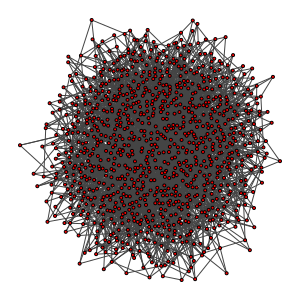

In [23]:
g=ig.Graph.Barabasi(1000,3)

ig.plot(g,vertex_size=3,bbox=(0,0,300,300))

In [4]:
Sy=ys([ig.Graph.Barabasi(1000,3),ig.Graph.Barabasi(1000,1),ig.Graph.Barabasi(1000,10)],0.2)

In [14]:
S=ms([g]*30)

Text(0.5, 1.0, 'Wealth distribution')

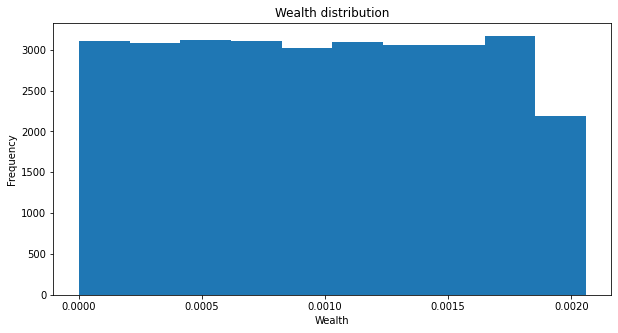

In [15]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.hist(S.getWealths())
ax.set_xlabel('Wealth')
ax.set_ylabel('Frequency')
ax.set_title('Wealth distribution')


In [16]:
S.getWealths().size

30000

In [19]:
S.termalize(1000)

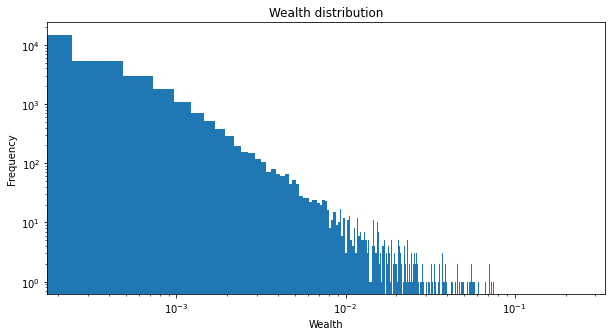

In [20]:

fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.hist(S.getWealths(),bins=1000)
ax.set_xlabel('Wealth')
ax.set_ylabel('Frequency')
ax.set_title('Wealth distribution')
#loglog scale
ax.set_yscale('log')
ax.set_xscale('log')

In [22]:
S.getGini()

array([0.7627323 , 0.83435446, 0.82438356, 0.8312261 , 0.83924735,
       0.7690683 , 0.8199629 , 0.78458965, 0.8288224 , 0.81523955,
       0.7856446 , 0.8622799 , 0.7857632 , 0.72277683, 0.8260072 ,
       0.7723588 , 0.7980078 , 0.8113685 , 0.8195604 , 0.7682214 ,
       0.8015105 , 0.798532  , 0.78276896, 0.79061216, 0.8440886 ,
       0.7759154 , 0.81156266, 0.827156  , 0.83750814, 0.83001465],
      dtype=float32)

Text(0, 0.5, 'Wealth')

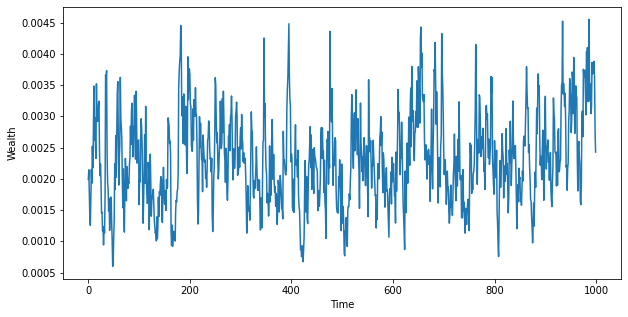

In [24]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(S.follow(1000,1))
ax.set_xlabel('Time')
ax.set_ylabel('Wealth')

In [29]:
S.getGini()

array([0.74260014, 0.61315125, 0.7623111 ], dtype=float32)

In [32]:
(getG(S.getWealths()[:1000],1000),getG(S.getWealths()[1000:2000],1000),getG(S.getWealths()[2000:],1000))

(0.7426001738071545, 0.6131512312348254, 0.7623111073229057)

In [22]:
def getG(x,n):
    "Retorna gini de un arreglo x de longitud n"
    sorted_x = np.sort(x)
    cumx = np.cumsum(sorted_x, dtype=np.float32)
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    

In [3]:
import networkx as nx 
#create erdos renyi graph
G=nx.erdos_renyi_graph(1000,0.1)

In [4]:
S=ys([G,G,G],0.2)

In [14]:
S.getWealths().sum()

3.0000005

In [13]:
S.reset(wealth_type='equal')